In [1]:
# Extract Tweet of a Specific person :

#https://fairyonice.github.io/extract-someones-tweet-using-tweepy.html

In [74]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler

In [44]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "pDuaMgkmHdTpPp63UYoKDrJp8"
consumer_secret = "tsdIJhPv1sw0P8mJPVT1hxjEWi4r9orOdq7HGpHms86YJvO5S6"
access_token = "1443204093799907339-uHxrmsGbEllVQPmwSCUW2vNK2buXxC"
access_token_secret = "yWAVLvi0NfCU6vCFoL5zbqIS5GwnDElutXXfhvsZdOK0V"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [5]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

# consumer_key = "Enter your Code"
# consumer_secret = "Enter your Code"
# access_token = "Enter your Code"
# access_token_secret = "Enter your Code"



# # Use the above credentials to authenticate the API.

# auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
# auth.set_access_token( access_token , access_token_secret )
# api = tweepy.API(auth)

In [45]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [46]:
# We will use api as api.search inside this tweepy cursor.
type(api)

tweepy.api.API

In [50]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=100, lang="en").items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        df.to_csv("TweetDataset.csv",index=False)
        #df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [51]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["Arsenal"]
get_tweets(Topic , Count=100)

In [52]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-09-30 05:58:47+00:00,RT,False,It will probably also be to do with met police...,0,0,
1,2021-09-30 05:58:45+00:00,Jay,False,@ESPNUK Tbf Chelsea have played Arsenal Totenh...,0,0,
2,2021-09-30 05:58:36+00:00,LM,False,RT @giggsclass1: I helped 18 reds out with tic...,0,13,
3,2021-09-30 05:58:35+00:00,Mudit Nawani,False,RT @TrollFootball: Arsenal fans to Barcelona f...,0,6565,
4,2021-09-30 05:58:31+00:00,Rhanking🔥,False,RT @TheEuropeanLad: 9 goals vs Arsenal.\n7 goa...,0,866,"Lagos, Nigeria"
5,2021-09-30 05:58:29+00:00,Edward,False,RT @UrugwiroVillage: President Kagame on Arsen...,0,146,Zimbabwe
6,2021-09-30 05:58:29+00:00,Dee,False,RT @TrollFootball: Arsenal fans to Barcelona f...,0,6565,"London, England"
7,2021-09-30 05:58:28+00:00,Aarón Pérez,False,RT @TrollFootball: Arsenal fans to Barcelona f...,0,6565,


# Analyze the tweets

In [53]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [54]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [55]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [56]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-09-30 05:58:47+00:00,RT,False,It will probably also be to do with met police...,0,0,,it will probably also be to do with met police...
1,2021-09-30 05:58:45+00:00,Jay,False,@ESPNUK Tbf Chelsea have played Arsenal Totenh...,0,0,,tbf chelsea have played arsenal totenham and l...
2,2021-09-30 05:58:36+00:00,LM,False,RT @giggsclass1: I helped 18 reds out with tic...,0,13,,rt i helped 18 reds out with tickets tonight s...
3,2021-09-30 05:58:35+00:00,Mudit Nawani,False,RT @TrollFootball: Arsenal fans to Barcelona f...,0,6565,,rt arsenal fans to barcelona fans
4,2021-09-30 05:58:31+00:00,Rhanking🔥,False,RT @TheEuropeanLad: 9 goals vs Arsenal.\n7 goa...,0,866,"Lagos, Nigeria",rt 9 goals vs arsenal 7 goals vs manchester ci...


In [57]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-09-30 05:58:47+00:00,RT,False,It will probably also be to do with met police...,0,0,,it will probably also be to do with met police...,Neutral
1,2021-09-30 05:58:45+00:00,Jay,False,@ESPNUK Tbf Chelsea have played Arsenal Totenh...,0,0,,tbf chelsea have played arsenal totenham and l...,Positive
2,2021-09-30 05:58:36+00:00,LM,False,RT @giggsclass1: I helped 18 reds out with tic...,0,13,,rt i helped 18 reds out with tickets tonight s...,Positive
3,2021-09-30 05:58:35+00:00,Mudit Nawani,False,RT @TrollFootball: Arsenal fans to Barcelona f...,0,6565,,rt arsenal fans to barcelona fans,Neutral
4,2021-09-30 05:58:31+00:00,Rhanking🔥,False,RT @TheEuropeanLad: 9 goals vs Arsenal.\n7 goa...,0,866,"Lagos, Nigeria",rt 9 goals vs arsenal 7 goals vs manchester ci...,Neutral


In [58]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 RT @GurjitAFC: Leno on being dropped by Arteta: "There was no clear reason why I was out, but it had nothing to do with my performance. He…

Clean tweet:
 rt leno on being dropped by arteta there was no clear reason why i was out but it had nothing to do with my performance he

Sentiment of the tweet:
 Negative


In [59]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Arsenal'] are : 101
Total Positive Tweets are : 21
Total Negative Tweets are : 10
Total Neutral Tweets are : 70


In [60]:
df["Sentiment"].value_counts()

Neutral     70
Positive    21
Negative    10
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

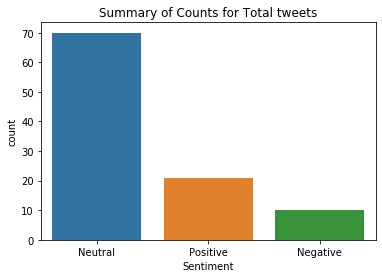

In [61]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


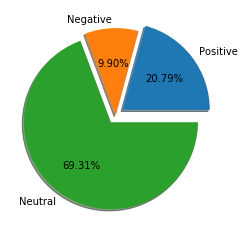

In [72]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

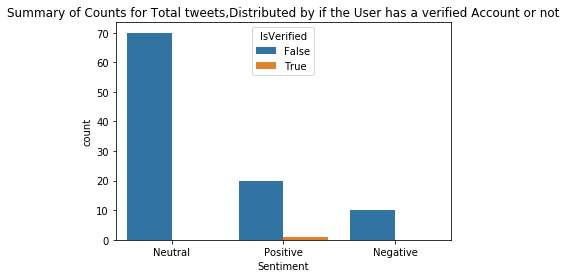

In [63]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# Generate WordCloud

In [64]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

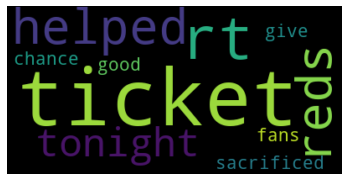

In [65]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
df.clean_tweet

0      it will probably also be to do with met police...
1      tbf chelsea have played arsenal totenham and l...
2      rt i helped 18 reds out with tickets tonight s...
3                      rt arsenal fans to barcelona fans
4      rt 9 goals vs arsenal 7 goals vs manchester ci...
                             ...                        
96                rt arsenal goal scored by foord 5 1 73
97     rt arsenal5 men who supports are the best ladi...
98                     rt arsenal fans to barcelona fans
99     us generals concerned over pak s nuclear arsen...
100    latest president hopes 35m contract offer will...
Name: clean_tweet, Length: 101, dtype: object

- **WordCloud for whole data(Topic not included in WordCloud)**

There are 6202 words in the combination of all review.


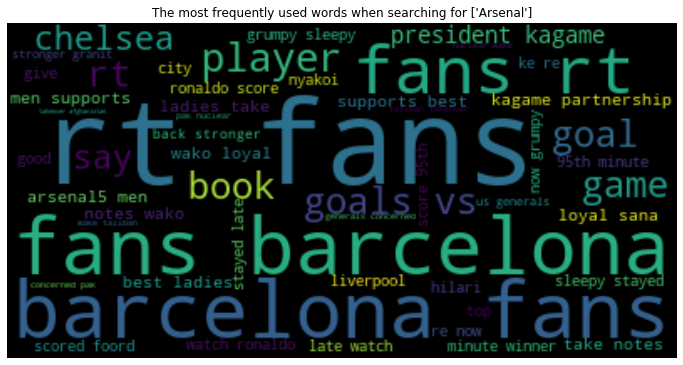

In [66]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

## NEW

- **Wordcloud for Positive tweets only (Topic not included in WordCloud)**

There are 6202 words in the combination of all review.


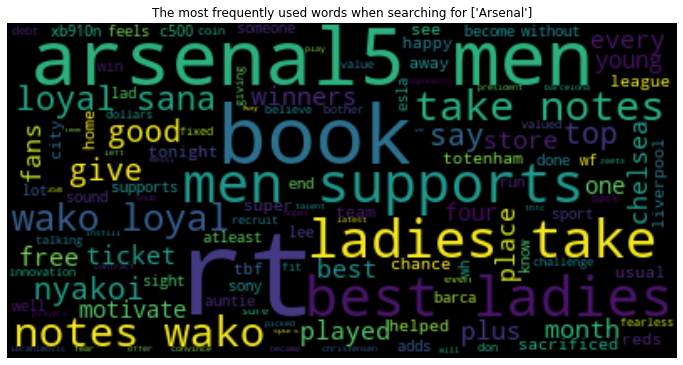

In [68]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

- **Wordcloud for Negative tweets only  (Topic not included in WordCloud)**

There are 6202 words in the combination of all review.


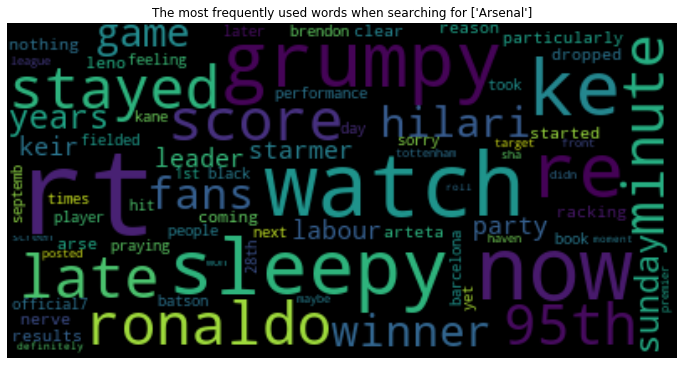

In [69]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

# Import image in streamlit.

import streamlit as st
from PIL import Image
import os
os.chdir("F:/Machine Learning/AI ML/Case Studies/Flask/TwitterFromScratch")
image = Image.open('Logo.jpg')
st.image(image, caption='Sunrise by the mountains',use_column_width=True)
st.pyplot()